# Part 1: Binary Classsification w/ Classical (non-neural network) Models

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Problem-Statement-&amp;-Methodology" data-toc-modified-id="Problem-Statement-&amp;-Methodology-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement &amp; Methodology</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Processing-Datasets-For-Modeling" data-toc-modified-id="Processing-Datasets-For-Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Processing Datasets For Modeling</a></span><ul class="toc-item"><li><span><a href="#Image-Dataset-for-Binary-Classification-Using-Classic-Models" data-toc-modified-id="Image-Dataset-for-Binary-Classification-Using-Classic-Models-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Image Dataset for Binary Classification Using Classic Models</a></span></li><li><span><a href="#Augmented-Image-Dataset-for-Binary-Classification-Using-Classic-Models" data-toc-modified-id="Augmented-Image-Dataset-for-Binary-Classification-Using-Classic-Models-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Augmented Image Dataset for Binary Classification Using Classic Models</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Binary-Classification-w/-Non-Augmented-Dataset" data-toc-modified-id="Binary-Classification-w/-Non-Augmented-Dataset-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Binary Classification w/ Non-Augmented Dataset</a></span><ul class="toc-item"><li><span><a href="#Tuning-Hyperparameters" data-toc-modified-id="Tuning-Hyperparameters-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Tuning Hyperparameters</a></span></li></ul></li><li><span><a href="#Model-List" data-toc-modified-id="Model-List-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Model List</a></span></li><li><span><a href="#Binary-Classification-w/-Augmented-Image-Dataset" data-toc-modified-id="Binary-Classification-w/-Augmented-Image-Dataset-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Binary Classification w/ Augmented Image Dataset</a></span></li><li><span><a href="#Implementing-Ensemble-Methods" data-toc-modified-id="Implementing-Ensemble-Methods-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Implementing Ensemble Methods</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Note:-Part-2-Involves-Multiclass-Classification-Using-Classical-(non-neural-network)-Models" data-toc-modified-id="Note:-Part-2-Involves-Multiclass-Classification-Using-Classical-(non-neural-network)-Models-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>Note: Part 2 Involves Multiclass Classification Using Classical (non-neural network) Models</a></span></li></ul></li></ul></li></ul></div>

## Abstract

Image classification is an extremely important part of digital image analysis which has direct applications in powering self-driving cars, drones, and in boosting augmented reality. The drive in the field has been to achieve a near-perfect image classifier. In this project, with optimal model hyperparameters, image augmentation, and ensemble methods, we show the path towards achieving near-perfect multiclass image classification. Here, an ensemble of models including random forest and k-nearest neighbors are used to calculate scores for different metrics. Based on the highest accuracy score (balanced dataset), random forest model is used for predicting the labels on the test dataset. With image augmentation and ensemble learning methods, the accuracy improved from 95% to 99% for the binary classification and from 69% to 96% for the multiclass classification. 

## Problem Statement & Methodology

Near-perfect multiclass image classification is challenging, but it is a vital step in enabling various applications which require automation of tasks and controlling objects (e.g., drones) remotely where it would be impossible for human beings to be. There have been major developments in this field with the explosion of data, computational capability (e.g, GPUs), and efficient algorithms such as convolutional neural network. In this project, we showcase both binary and multiclass classifiers with accuracies >95%. Starting with image preprocessing, we use both classical models such as random forest, K nearest neighbors, logistic regression, and XGBoost, and convolutional neural net to predict the test images. Initially, we perform the test on binary dataset and gradually improve the accuracy score by optimizing the model hyperparameters. Furthermore, we use data augmentation to increase the dataset size, and implement ensemble methods to achieve the best score possible. Taking our learnings from a simple binary classification model, we implement the methods on multiclass (6 classes) dataset to explore the model performance. 

In general, multiclass image classification can be useful for the following applications: 

1. Drone technology
2. Manufacturing defect detection
3. Facial Recognition
4. Handwriting detection
5. Self Driving Cars
6. Disease detection (Medical Images)

## Data

The dataset was obtained from Kaggle competition (https://www.kaggle.com/puneet6060/intel-image-classification). The data contains ~25000 images of size 150x150 distributed under 6 categories: (1) Buildings (2) Forest (3) Glacier (4) Mountain (5) Sea (6) Street). The data was published by Intel to host an Image classification challenge.

## Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import glob
import os, shutil
import keras
import mahotas
import h5py
import cv2 as cv
import seaborn as sn
import matplotlib.pyplot as plt
from random import randint
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from keras.utils import to_categorical
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from skimage.color import rgb2gray
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, 
                             precision_recall_curve, f1_score, fbeta_score, roc_auc_score, roc_curve, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.externals import joblib
from scipy.interpolate import interp1d
from ipywidgets import interactive, FloatSlider
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.utils as Utils
from keras import models, layers, optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn import decomposition
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)
import pickle
from bokeh.plotting import figure, show
from bokeh.embed import components
from bokeh.models import CategoricalColorMapper, HoverTool
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.filterwarnings('ignore');

## Exploratory Data Analysis

The following section shows the images from different categories/classes. Beforehand, we read each image and then resize it to (150,150). 

__Reading Images In Image Dataset:__

In [25]:
"""
"images" function: returns list of image names and their corresponding labels.
Each image in each folders are read and resized to (150,150) such that the sizes are consistent across the images. 
The images/labels are shuffled to make sure that there is no biasness in model's learning due to the sequence in 
which the images appear.

random_state=42: preserves the state/order of Images and Labels lists such that it's reproducible when we rerun the code.
"""
def images(image_directory):
    Images = []
    Labels = []
        
    for labels in os.listdir(image_directory): # "os.listdir(image_directory)" extracts the folder names in "image_directory".
        # Converting each string labels to numeric
        if labels == 'buildings': 
            label = 0 
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5
        # Loops through each file in the directory and resizes it
        for image_file in os.listdir(image_directory+labels):
            image = cv.imread(image_directory+labels+r'/'+image_file)
            image = cv.resize(image,(150,150))
            Images.append(image)
            Labels.append(label)
            
    return shuffle(Images, Labels, random_state=42) 

In [30]:
Images, Labels = images('../seg_train/')

# Converting the list of images to an array
Images = np.array(Images)
Labels = np.array(Labels)

In [54]:
"""
Each images are in a matrix format where the numbers in the array/matrix refer to the R/G/B pixel values. 
The following shows R/G/B pixel values of the first pixel of the first image in the "Images" list. 
""" 
Images[0][0][0]

array([89, 99, 46], dtype=uint8)

In [55]:
"""
The following shows the numeric values of the labels of the images in the "Images" list. 
E.g., as shown above "1" corresponds to "forest".  
""" 
Labels

array([1, 4, 4, ..., 2, 1, 5])

__Retrieving String Class Labels:__

In [56]:
"""
"get_classlabel" function: returns string value of the label when it's provided with the numeric value of the label.
""" 
def get_classlabel(numeric_label):
    labels = {0:'buildings',1:'forest',2:'glacier',3:'mountain',4:'sea',5:'street'}
    return labels[numeric_label]

__Displaying Randomly Selected Images In The Image Dataset:__

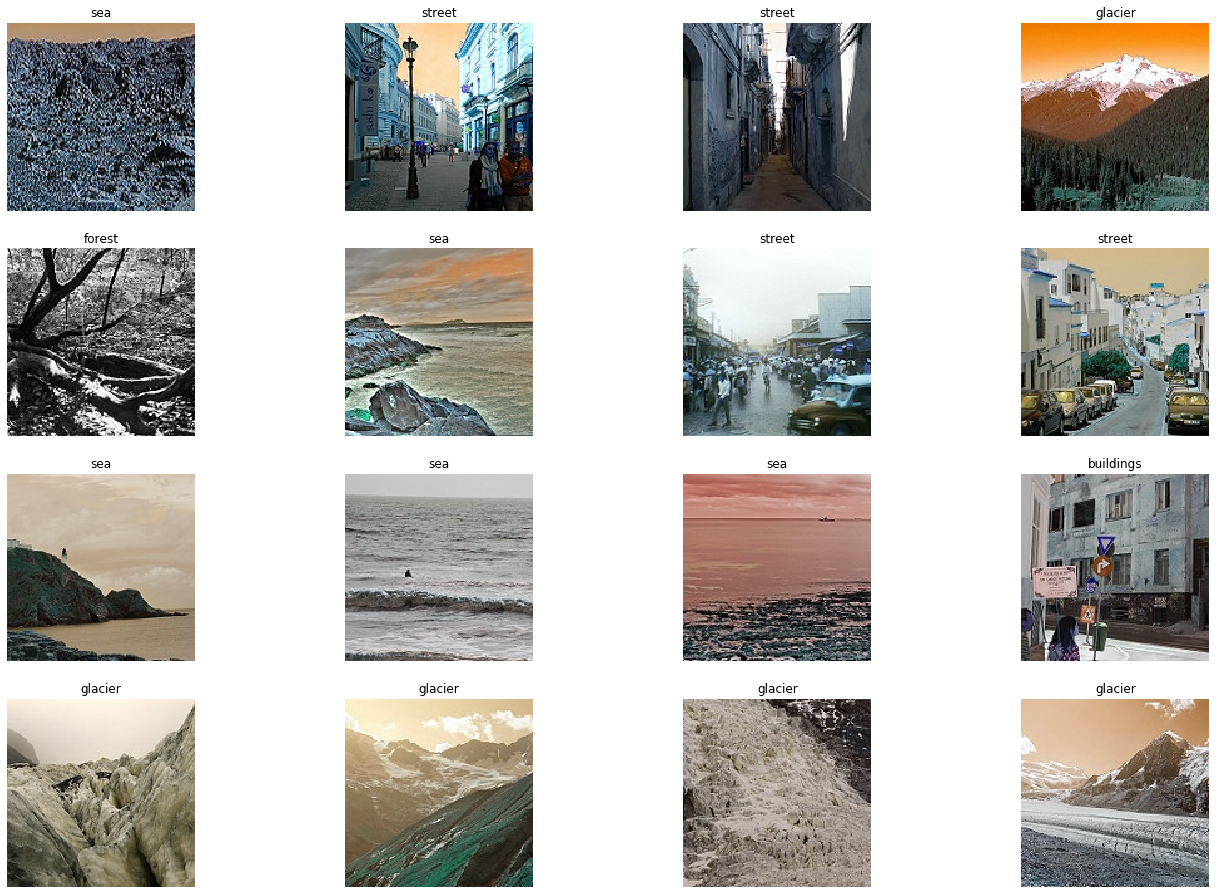

In [58]:
"""
Plotting 16 randomly selected images in the image dataset along with their labels on top.
""" 
f,ax = plt.subplots(4,4)
f.subplots_adjust(0,0,3,3)

for i in range(0,4,1):
    for j in range(0,4,1):
        random_number = randint(0,len(Images))
        ax[i,j].imshow(Images[random_number])
        ax[i,j].set_title(get_classlabel(Labels[random_number]))
        ax[i,j].axis(False)

## Processing Datasets For Modeling

After resizing the images, we preprocess the data for modeling which includes extracting features from the resized images and furthermore scaling the features!

### Image Dataset for Binary Classification Using Classic Models

In [64]:
"""
"image_features" function: extracts Hu Moments, Histogram of Oriented Gradients and Haralick features of each image. 
It scales the image features in the range (0,1).
Hu Moments: Quantifies the shape of an object in an image.
Histogram of Oriented Gradients: Quatifies the edges and its directions. In general, it extracts the gradient and orientation of the edges.
Haralick: Quantifies texture of an image. 
"""
def image_features(image_directory):
    global_features_binaryclass = []
    labels_binaryclass = []

    for labels in os.listdir(image_directory):
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1

        for image_file in os.listdir(image_directory+labels):
            image = cv.imread(image_directory+labels+r'/'+image_file)
            image = cv.resize(image,(150,150))

            image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            hu_moments = cv2.HuMoments(cv2.moments(image1)).flatten()
            haralick = mahotas.features.haralick(image1).mean(axis=0).flatten()

            image2 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            hist  = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()
            histogram = cv2.normalize(hist, hist)

            global_feature = np.hstack([histogram,haralick,hu_moments])

            global_features_binaryclass.append(global_feature)
            labels_binaryclass.append(label)
    
    le = LabelEncoder()
    target = le.fit_transform(labels_binaryclass)

    scaler = MinMaxScaler(feature_range=(0, 1))
    global_features_binaryclass = scaler.fit_transform(global_features_binaryclass)

    global_features_binaryclass  = np.array(global_features_binaryclass)
    labels_binaryclass = np.array(target)
    
    return global_features_binaryclass, labels_binaryclass

In [66]:
binaryclass_image_directory = '../Binary/seg_train/'

global_features_binaryclass, labels_binaryclass = image_features(binaryclass_image_directory)

After extracting features, we generate train and test dataset for modeling.

__Generating Train/Test Dataset:__

In [68]:
"""
"train_test_split" function: splits feature & label data into training and test data in 80% and 20% ratio, respectively.
random_state=42: preserves the split such that it's reproducible when we rerun the code
"""

(train_imagedata_binary, test_imagedata_binary, train_labeldata_binary, test_labeldata_binary) = train_test_split(np.array(global_features_binaryclass),
                                                                                          np.array(labels_binaryclass),
                                                                                          test_size=0.2,
                                                                                          random_state=42)

### Augmented Image Dataset for Binary Classification Using Classic Models

Image augmentation is a neat trick to increase the number of images in the dataset by applying various mathematical transformations to a given image such as rotation, shear, zoom, etc. This enables better learning by the model.

In [69]:
"""
"image_augmentation" function: generates a set of augmented images with 
attributes such as rotation, width shift, height shift, shear, zoom, and horizontal flip.
"""
def image_augmentation(input_folder,output_folder,prefix):
    
    datagen = ImageDataGenerator(rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

    images = os.listdir(input_folder)
    for image_file in images: 
        image_file = load_img(input_folder+"/"+image_file)  
        x = img_to_array(image_file)  
        x = x.reshape((1,) + x.shape)  
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=output_folder, save_prefix=prefix, save_format='jpeg'):
            i += 1
            if i > 40:
                break  # We need a break statement or else the script will keep on generating images indefinitely

__Generating Augmented Images for "buildings":__

In [71]:
input_folder_buildings = '../buildings'
output_folder_buildings = '../multiclasss_augmented/buildings'
prefix_buildings = 'buildings'

In [72]:
image_augmentation(input_folder_buildings,output_folder_buildings,prefix_buildings)

__Generating Augmented Images for "forest":__

In [73]:
input_folder_forest = '../forest'
output_folder_forest = '../multiclasss_augmented/forest'
prefix_forest = 'forest'

In [74]:
image_augmentation(input_folder_forest,output_folder_forest,prefix_forest)

__Generating Labels and Features For Augmented Image Dataset:__

In [75]:
binaryclass_image_directory_augmented = '../binary_augmented/'

global_features_binaryclass_augmented, labels_binaryclass_augmented = image_features(binaryclass_image_directory_augmented)

__Generating Train/Test Dataset From Augmented Image Dataset:__

In [76]:
(train_imagedata_binary_augmented, test_imagedata_binary_augmented, train_labeldata_binary_augmented, test_labeldata_binary_augmented) = train_test_split(np.array(global_features_binaryclass_augmented),
                                                                                          np.array(labels_binaryclass_augmented),
                                                                                          test_size=0.2,
                                                                                          random_state=42)

## Modeling

After generating a train and test dataset, we explore different classification models such as logistic regression, random forest, and so on, such that the model performs the best (based on metric of interest such as accuracy) on the training dataset and furthermore on the test dataset. In order to do so, we first find the optimal hyperparameters for various classification models of interest and then train the models using both the non-augmented and augmented dataset. 

### Binary Classification w/ Non-Augmented Dataset

#### Tuning Hyperparameters

__1. Finding optimal value of C in Logistic Regression__

We choose accuracy over other metrics since the image dataset is balanced and we would want to make sure that our model has high prediction for both the classes.

In [82]:
LR_results = []
index_LR = []

for i in np.arange(0.1,5,0.1):
    cv_results = cross_val_score(LogisticRegression(random_state=9,C=i), train_imagedata_binary, train_labeldata_binary, cv=10, scoring="accuracy")
    LR_results.append(cv_results.mean())
    index_LR.append(i)
    status = "%s: %f (%f)" % ('LR', cv_results.mean(), cv_results.std())
    print(status)

LR: 0.927712 (0.011528)
LR: 0.929394 (0.011795)
LR: 0.931355 (0.012216)
LR: 0.931355 (0.010928)
LR: 0.931915 (0.010842)
LR: 0.931915 (0.009857)
LR: 0.932476 (0.009968)
LR: 0.932755 (0.010325)
LR: 0.932475 (0.010434)
LR: 0.933315 (0.009269)
LR: 0.933595 (0.009864)
LR: 0.934156 (0.010497)
LR: 0.935276 (0.010056)
LR: 0.935276 (0.010439)
LR: 0.936116 (0.010240)
LR: 0.936677 (0.010117)
LR: 0.936956 (0.010281)
LR: 0.937236 (0.010201)
LR: 0.937236 (0.010201)
LR: 0.937516 (0.010715)
LR: 0.938076 (0.010962)
LR: 0.938356 (0.010713)
LR: 0.938637 (0.010963)
LR: 0.938637 (0.010963)
LR: 0.938356 (0.011073)
LR: 0.938356 (0.011073)
LR: 0.938356 (0.011073)
LR: 0.938356 (0.011144)
LR: 0.938637 (0.010819)
LR: 0.938917 (0.011409)
LR: 0.939197 (0.011495)
LR: 0.939477 (0.011642)
LR: 0.939757 (0.011713)
LR: 0.939757 (0.011713)
LR: 0.939757 (0.011304)
LR: 0.940038 (0.011156)
LR: 0.939197 (0.011698)
LR: 0.939757 (0.012108)
LR: 0.939476 (0.012302)
LR: 0.939476 (0.012302)
LR: 0.939476 (0.012302)
LR: 0.939196 (0.

In [83]:
LR_results = [i*100 for i in LR_results]

Text(0, 0.5, 'Accuracy (%)')

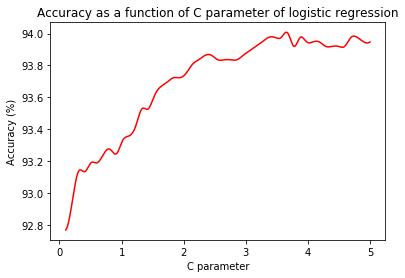

In [84]:
x = np.linspace(0.1, 5, num=len(LR_results), endpoint=True)
xnew = np.linspace(0.1, 5, num=1001, endpoint=True)
f = interp1d(x, LR_results, kind='cubic')
plt.plot(xnew,f(xnew),color='r')
plt.title("Accuracy as a function of C parameter of logistic regression")
plt.xlabel("C parameter")
plt.ylabel("Accuracy (%)")

In [85]:
index_max_LRaccuracy = np.argmax(LR_results)
optimal_C = index_LR[index_max_LRaccuracy]
print ("Optimal value of C is",optimal_C)

Optimal value of C is 3.6


__2. Finding optimal number of nearest neighbors in Random Forest__

In [86]:
KNN_results = []
index_KNN = []

for i in range(1,50,5):
    cv_results = cross_val_score(KNeighborsClassifier(n_neighbors=i), train_imagedata_binary, train_labeldata_binary, cv=10, scoring='accuracy')
    KNN_results.append(cv_results.mean())
    index_KNN.append(i)
    status = "%s: %f (%f)" % ('KNN', cv_results.mean(), cv_results.std())
    print(status)

KNN: 0.897732 (0.015801)
KNN: 0.914263 (0.014773)
KNN: 0.912301 (0.008771)
KNN: 0.915381 (0.008493)
KNN: 0.911459 (0.011640)
KNN: 0.913982 (0.010703)
KNN: 0.912857 (0.011748)
KNN: 0.913419 (0.011326)
KNN: 0.913418 (0.010982)
KNN: 0.912858 (0.010981)


In [87]:
KNN_results = [i*100 for i in KNN_results]

Text(0, 0.5, 'Accuracy (%)')

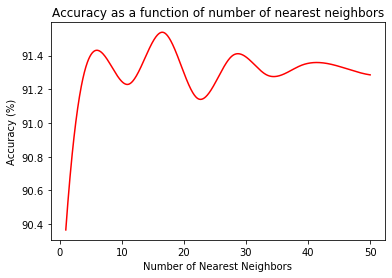

In [88]:
x = np.linspace(0, 50, num=10, endpoint=True)
xnew = np.linspace(1, 50, num=1001, endpoint=True)
f = interp1d(x, KNN_results, kind='cubic')
plt.plot(xnew,f(xnew),color='r')
plt.title("Accuracy as a function of number of nearest neighbors")
plt.xlabel("Number of Nearest Neighbors")
plt.ylabel("Accuracy (%)")

In [89]:
index_max_KNNaccuracy = np.argmax(KNN_results)
optimal_numberofneighbors = index_KNN[index_max_KNNaccuracy]
print ("Optimal number of nearest neighbors is", optimal_numberofneighbors)

Optimal number of nearest neighbors is 16


__3. Finding optimal number of trees in Random Forest__

In [90]:
RF_results = []
index_RF = []

for i in range(1,100,10):
    cv_results = cross_val_score(RandomForestClassifier(n_estimators=i, random_state=9), train_imagedata_binary, train_labeldata_binary, cv=10, scoring='accuracy')
    RF_results.append(cv_results.mean())
    index_RF.append(i)
    status = "%s: %f (%f)" % ('RF', cv_results.mean(), cv_results.std())
    print(status)

RF: 0.885689 (0.019648)
RF: 0.939199 (0.013139)
RF: 0.943681 (0.011651)
RF: 0.944802 (0.010781)
RF: 0.944802 (0.011139)
RF: 0.945362 (0.011012)
RF: 0.942841 (0.012666)
RF: 0.945082 (0.012669)
RF: 0.946203 (0.012455)
RF: 0.947044 (0.013046)


In [91]:
RF_results = [i*100 for i in RF_results]

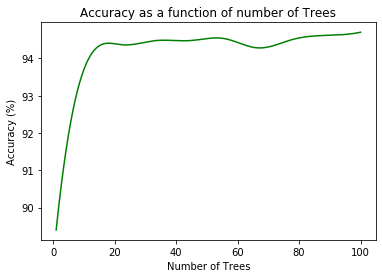

In [92]:
x = np.linspace(0, 100, num=len(RF_results), endpoint=True)
xnew = np.linspace(1, 100, num=1001, endpoint=True)
f = interp1d(x, RF_results, kind='cubic')
plt.plot(xnew,f(xnew),color='green');
plt.title("Accuracy as a function of number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy (%)")
plt.show();

In [93]:
index_max_RFaccuracy = np.argmax(RF_results)
optimal_numberofTrees = index_RF[index_max_RFaccuracy]
print ("Optimal number of trees is",optimal_numberofTrees)

Optimal number of trees is 91


__4. Finding optimal depth of Random Forest__

In [94]:
RF_depth_results = []
index_RF = []

for i in range(1,20,2):
    cv_results = cross_val_score(RandomForestClassifier(n_estimators=261, max_depth=i,random_state=9), train_imagedata_binary, train_labeldata_binary, cv=10, scoring='accuracy')
    RF_depth_results.append(cv_results.mean())
    index_RF.append(i)
    status = "%s: %f (%f)" % ('RF', cv_results.mean(), cv_results.std())
    print(status)

RF: 0.855148 (0.014393)
RF: 0.917348 (0.013659)
RF: 0.937239 (0.013142)
RF: 0.941165 (0.014214)
RF: 0.944524 (0.011862)
RF: 0.947045 (0.011299)
RF: 0.949572 (0.014216)
RF: 0.948728 (0.012008)
RF: 0.948448 (0.011619)
RF: 0.947609 (0.012642)


In [95]:
RF_depth_results = [i*100 for i in RF_depth_results]

Text(0, 0.5, 'Accuracy (%)')

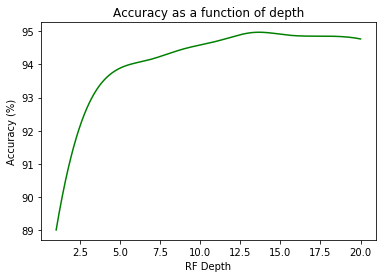

In [96]:
x = np.linspace(0, 20, num=len(RF_depth_results), endpoint=True)
xnew = np.linspace(1, 20, num=1001, endpoint=True)
f = interp1d(x, RF_depth_results, kind='cubic')
plt.plot(xnew,f(xnew),color='green')
plt.title("Accuracy as a function of depth")
plt.xlabel("RF Depth")
plt.ylabel("Accuracy (%)")

In [97]:
index_max_RFdepthaccuracy = np.argmax(RF_depth_results)
optimal_depth = index_RF[index_max_RFdepthaccuracy]
print ("Optimal depth is",optimal_depth)

Optimal depth is 13


__5. Finding optimal depth of Decision Tree__

In [98]:
DT_depth_results = []
index_DT = []

for i in range(1,20,2):
    cv_results = cross_val_score(DecisionTreeClassifier(max_depth=i,random_state=9), train_imagedata_binary, train_labeldata_binary, cv=10, scoring='accuracy')
    DT_depth_results.append(cv_results.mean())
    index_DT.append(i)
    status = "%s: %f (%f)" % ('DT', cv_results.mean(), cv_results.std())
    print(status)

DT: 0.900818 (0.012121)
DT: 0.907543 (0.015314)
DT: 0.922109 (0.007153)
DT: 0.918466 (0.011569)
DT: 0.915668 (0.010629)
DT: 0.913706 (0.012041)
DT: 0.910344 (0.012621)
DT: 0.913424 (0.008872)
DT: 0.910621 (0.010719)
DT: 0.909222 (0.010088)


In [99]:
DT_depth_results = [i*100 for i in DT_depth_results]

Text(0, 0.5, 'Accuracy (%)')

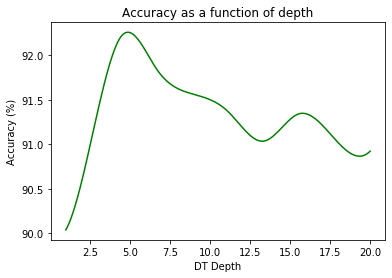

In [100]:
x = np.linspace(0, 20, num=len(DT_depth_results), endpoint=True)
xnew = np.linspace(1, 20, num=1001, endpoint=True)
f = interp1d(x, DT_depth_results, kind='cubic')
plt.plot(xnew,f(xnew),color='green')
plt.title("Accuracy as a function of depth")
plt.xlabel("DT Depth")
plt.ylabel("Accuracy (%)")

In [101]:
index_max_DTdepthaccuracy = np.argmax(DT_depth_results)
optimal_depth = index_DT[index_max_DTdepthaccuracy]
print ("Optimal depth is",optimal_depth)

Optimal depth is 5


### Model List

Explain why we choose these models

In [111]:
models = []
models.append(('LR', LogisticRegression(C=3.6)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=16)))
models.append(('DT', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(n_estimators=91,max_depth=13)))
models.append(('NB', GaussianNB()))
models.append(('XGBoost', XGBClassifier()))

__Retrieving Accuracy Score Of Different Models:__

In [88]:
"""
"score" function: returns each models' mean cross-validation score and plots the box-plot of metric vs. models. 
"""
def score(scoring,image_features,image_labels):
    model_cv_mean = []
    model_cv_results = []
    model_names   = []

    for name, model in models:
        kfold = KFold(n_splits=10, random_state=10)
        cv_results = cross_val_score(model, image_features, image_labels, cv=kfold, scoring=scoring)
        model_cv_results.append(cv_results)
        model_names.append(name)
        model_cv_mean.append(cv_results.mean())
        status = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(status)

    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Model Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(model_cv_results)
    ax.set_xticklabels(model_names)
    plt.ylabel(str(scoring)+" "+"(x100 %)")
    plt.show()
    
    return model_cv_mean

__Retrieving Accuracy Score Of Different Models:__

LR: 0.937234 (0.010664)
LDA: 0.934156 (0.012415)
KNN: 0.914263 (0.014879)
DT: 0.923234 (0.010833)
RF: 0.949566 (0.009116)
NB: 0.780043 (0.038563)
SVM: 0.938915 (0.013672)
XGBoost: 0.953208 (0.010259)


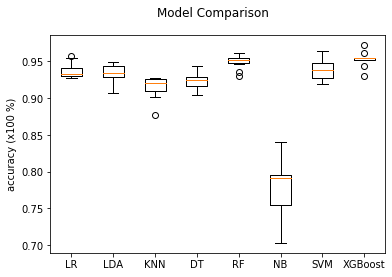

In [89]:
scoring    = "accuracy"

accuracy_list = score(scoring,train_imagedata_binary,train_labeldata_binary)

__Retrieving Precision Score Of Different Models:__

LR: 0.944364 (0.023038)
LDA: 0.931565 (0.027847)
KNN: 0.921926 (0.030765)
DT: 0.935128 (0.020925)
RF: 0.952419 (0.017095)
NB: 0.708682 (0.047951)
SVM: 0.944009 (0.024631)
XGBoost: 0.959732 (0.017140)


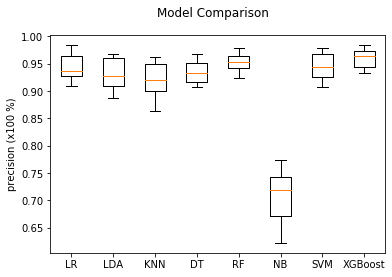

In [91]:
scoring    = "precision"

precision_list = score(scoring,train_imagedata_binary,train_labeldata_binary)

__Retrieving Recall Score Of Different Models:__

LR: 0.930246 (0.016227)
LDA: 0.937751 (0.014225)
KNN: 0.906185 (0.016613)
DT: 0.909165 (0.017814)
RF: 0.941669 (0.024859)
NB: 0.959651 (0.017061)
SVM: 0.934126 (0.021075)
XGBoost: 0.947108 (0.020862)


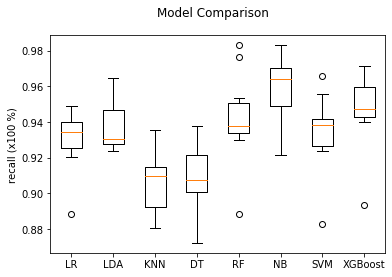

In [95]:
scoring    = "recall"

recall_list = score(scoring,train_imagedata_binary,train_labeldata_binary)

__Retrieving F1 Score Of Different Models:__

LR: 0.936978 (0.011889)
LDA: 0.934354 (0.014668)
KNN: 0.913668 (0.017589)
DT: 0.923774 (0.011497)
RF: 0.949432 (0.011181)
NB: 0.814486 (0.034561)
SVM: 0.938718 (0.015087)
XGBoost: 0.953105 (0.010630)


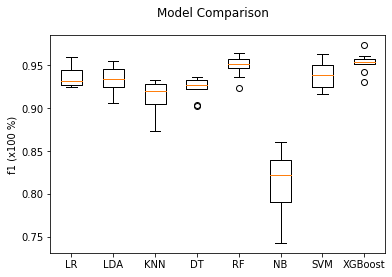

In [94]:
scoring    = "f1"

f1_list = score(scoring,train_imagedata_binary,train_labeldata_binary)

__Generating Dataframe Of Scores On Different Metrics:__

Now, we put together the models we trained and different metric scores we obtained on the training dataset. 

In [98]:
model_names = ['LR','LDA','KNN','DT','RF','NB','SVM', 'XGBoost']
score_dataframe = pd.DataFrame({'model':model_names,'accuracy':accuracy_list,'f1':f1_list,'precision':precision_list,'recall':recall_list})

In [99]:
score_dataframe

,model,accuracy,f1,precision,recall
0,LR,0.937234,0.936978,0.944364,0.930246
1,LDA,0.934156,0.934354,0.931565,0.937751
2,KNN,0.914263,0.913668,0.921926,0.906185
3,DT,0.923234,0.923774,0.935128,0.909165
4,RF,0.949566,0.949432,0.952419,0.941669
5,NB,0.780043,0.814486,0.708682,0.959651
6,SVM,0.938915,0.938718,0.944009,0.934126
7,XGBoost,0.953208,0.953105,0.959732,0.947108


Since we are interested in making sure that our model is able to classify both the classes (balanced dataset) as correctly as possible, we choose accuracy as the metric for image classification. Here, accuracy refers to the ratio of number of correct predictions to the total number of input samples. Additionally, XGBoost results in the highest classification accuracy amongst the set of classifiers we tried. Hence, we choose XGBoost as the model of our choice and test it on unseen image dataset, i.e., test dataset from earlier train/test split.

__Testing Image Dataset w/ Optimal Model:__

This process is essential in finding out about how well our model can generalize to the unseen data. If the accuracy is close to the training case, then the model is able to generalize well. On the other hand, if the accuracy falls from the training case then the model might be experiencing overfitting. 

In [104]:
"""
"classification_accuracy" function: returns the classification accuracy of the test dataset
"""
def classification_accuracy(classifier, train_image_data, train_label_data, test_image_data, test_label_data):
    clf  = classifier

    # fit the training data to the model
    clf = clf.fit(train_image_data, train_label_data)

    #Predict the response for test dataset
    y_pred = clf.predict(test_image_data)


    # Model Accuracy
    print("Binary Classification Accuracy:",round(metrics.accuracy_score(test_label_data, y_pred)*100,2),'%')

In [107]:
classification_accuracy(XGBClassifier(),train_imagedata_binary,train_labeldata_binary,test_imagedata_binary, test_labeldata_binary)

Binary Classification Accuracy: 95.18 %


Since the test accuracy is comparable to the training accuracy, the model is able to generalize well with minimal overfitting. 

__Can we do better?__

We believe that with larger dataset, we can push the test accuracy further. In this case, we use data augmentation (as mentioned above) to increase the size of dataset by performing various mathematical transformations on a given image.

### Binary Classification w/ Augmented Image Dataset

__Retrieving Accuracy Score Of Different Models:__

LR: 0.952434 (0.003567)
LDA: 0.947684 (0.002584)
KNN: 0.983562 (0.002201)
DT: 0.930745 (0.006390)
RF: 0.986249 (0.002438)
NB: 0.816488 (0.027508)
XGBoost: 0.966998 (0.004087)


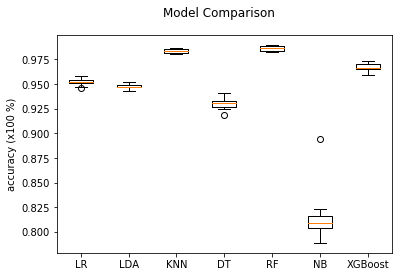

In [112]:
scoring    = "accuracy"

accuracy_list_augmented = score(scoring,train_imagedata_binary_augmented,train_labeldata_binary_augmented)

We observe that data augmentation boosted training accuracy from 95.3% to 98.6%. Furthermore, we choose Random Forest to test on our unseen data.

__Testing Random Forest on Augmented Image Dataset:__

In [113]:
classification_accuracy(RandomForestClassifier(),train_imagedata_binary_augmented,train_labeldata_binary_augmented,test_imagedata_binary_augmented, test_labeldata_binary_augmented)


Binary Classification Accuracy: 98.9 %


Thus, we were able to increase the testing accuracy from 95.2% to 98.9% using data augmentation. Now, we explore ROC and Confusion Matrix to have a deeper look into the quality of our classification model.

__Generating ROC Curve__

A receiver operating characteristic (ROC) curve is generated by plotting the true positive rate against the false positive rate at various threshold settings. We use different models of choice to find out the area under the curve (AUC). Larger the AUC, better the classification model.

In [114]:
LR  = LogisticRegression(C=3.6)
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier(n_neighbors=16)
RF  = RandomForestClassifier(n_estimators=91,max_depth=13)
DT = DecisionTreeClassifier(max_depth=5)
XGBoost = XGBClassifier()

# Fit the training data to the model
LR = LR.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)
LDA = LDA.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)
KNN = KNN.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)
RF = RF.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)
DT = DT.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)
XGBoost = XGBoost.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)

fpr1, tpr1, thresholds = roc_curve(test_labeldata_binary_augmented, LR.predict_proba(test_imagedata_binary_augmented)[:,1])
fpr2, tpr2, thresholds = roc_curve(test_labeldata_binary_augmented, LDA.predict_proba(test_imagedata_binary_augmented)[:,1])
fpr3, tpr3, thresholds = roc_curve(test_labeldata_binary_augmented, KNN.predict_proba(test_imagedata_binary_augmented)[:,1])
fpr4, tpr4, thresholds = roc_curve(test_labeldata_binary_augmented, RF.predict_proba(test_imagedata_binary_augmented)[:,1])
fpr5, tpr5, thresholds = roc_curve(test_labeldata_binary_augmented, DT.predict_proba(test_imagedata_binary_augmented)[:,1])
fpr6, tpr6, thresholds = roc_curve(test_labeldata_binary_augmented, XGBoost.predict_proba(test_imagedata_binary_augmented)[:,1])

ROC AUC score of Logistic Regression =  0.990896512617522
ROC AUC score of LDA =  0.9887705904178239
ROC AUC score of KNN =  0.9970972648784552
ROC AUC score of Random Forest =  0.9979530841998202
ROC AUC score of Decision Tree =  0.9681847979686354
ROC AUC score of XGBoost =  0.9955636406548931


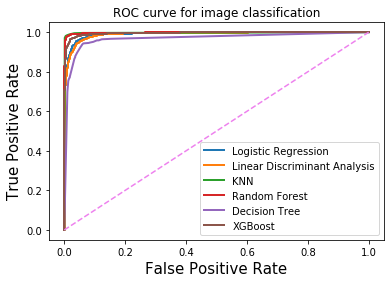

In [115]:
plt.plot(fpr1, tpr1,lw=2,label='Logistic Regression')
plt.plot(fpr2, tpr2,lw=2,label='Linear Discriminant Analysis')
plt.plot(fpr3, tpr3,lw=2,label='KNN')
plt.plot(fpr4, tpr4,lw=2,label='Random Forest')
plt.plot(fpr5, tpr5,lw=2,label='Decision Tree')
plt.plot(fpr6, tpr6,lw=2,label='XGBoost')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC curve for image classification');
print("ROC AUC score of Logistic Regression = ", roc_auc_score(test_labeldata_binary_augmented, LR.predict_proba(test_imagedata_binary_augmented)[:,1]))
print("ROC AUC score of LDA = ", roc_auc_score(test_labeldata_binary_augmented, LDA.predict_proba(test_imagedata_binary_augmented)[:,1]))
print("ROC AUC score of KNN = ", roc_auc_score(test_labeldata_binary_augmented, KNN.predict_proba(test_imagedata_binary_augmented)[:,1]))
print("ROC AUC score of Random Forest = ", roc_auc_score(test_labeldata_binary_augmented, RF.predict_proba(test_imagedata_binary_augmented)[:,1]))
print("ROC AUC score of Decision Tree = ", roc_auc_score(test_labeldata_binary_augmented, DT.predict_proba(test_imagedata_binary_augmented)[:,1]))
print("ROC AUC score of XGBoost = ", roc_auc_score(test_labeldata_binary_augmented, XGBoost.predict_proba(test_imagedata_binary_augmented)[:,1]))
plt.savefig('ROCCurve.png',dpi=600)

We learn that the AUC scores are very high. This would imply that our model is performing very well or is able to generalize well on the unseeen data.

Additionally, we plot the confusion matrix to get an idea of the number of false positives and false negatives in comparison to the true positives and true negatives. In general, from this, we obtain info. on the precision and recall of our model.

__Generating Confusion Matrix:__

In [83]:
"""
"make_confusion_matrix" function: plots the confusion matrix of our binary classification model
"""

def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(test_imagedata_binary_augmented)[:, 1] >= threshold)
    binary_confusion = confusion_matrix(test_labeldata_binary_augmented, y_predict)
    plt.figure(dpi=80)
    sn.heatmap(binary_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['buildings', 'forest'], yticklabels=['buildings', 'forest']);
    plt.xlabel('Prediction',fontsize=15)
    plt.ylabel('Actual',fontsize=15)
    plt.savefig('BinaryConfusionMatrix.png',dpi=600)
    plt.autoscale()

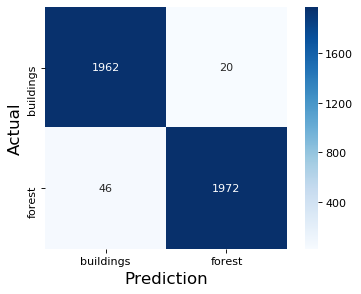

In [84]:
make_confusion_matrix(RF)

As expected from earlier calculations of precision and recall, the false positives and false negatives are really low. This may be further improved by using an even larger dataset and/or implementing ensemble learning methods.

__Can we do even better?__

To find out if we can improve our model further, we try ensemble learning methods such as Voting Classifiers.

### Implementing Ensemble Methods

__Hard Voting Classifier:__

In [89]:
hard_voting_classifier = VotingClassifier(estimators=[('KNN', KNN), ('XGBoost', XGBoost), ('RF', RF)], voting='hard')

In [90]:
hard_voting_classifier = hard_voting_classifier.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)

In [94]:
y_pred_hardvotingclassifier = hard_voting_classifier.predict(test_imagedata_binary_augmented)

print("Binary Classification Accuracy w/ Augmented Dataset & Hard Voting Classifier:",round(metrics.accuracy_score(test_labeldata_binary_augmented, y_pred_hardvotingclassifier)*100,2),'%')

Binary Classification Accuracy w/ Augmented Dataset & Hard Voting Classifier: 98.5 %


__Soft Voting Classifier:__

In [92]:
soft_voting_classifier = VotingClassifier(estimators=[('KNN', KNN), ('XGBoost', XGBoost), ('RF', RF)], voting='soft')

In [93]:
soft_voting_classifier = soft_voting_classifier.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)

In [95]:
y_pred_softvotingclassifier = soft_voting_classifier.predict(test_imagedata_binary_augmented)

print("Binary Classification Accuracy w/ Augmented Dataset & Soft Voting Classifier:",round(metrics.accuracy_score(test_labeldata_binary_augmented, y_pred_softvotingclassifier)*100,2),'%')

Binary Classification Accuracy w/ Augmented Dataset & Soft Voting Classifier: 99.05 %


__Weighted Voting Classifier:__

In [99]:
weighted_voting_classifier = VotingClassifier(estimators=[('KNN', KNN), ('XGBoost', XGBoost), ('RF', RF)], voting='soft',weights=[0.984,0.967,0.987])

In [100]:
weighted_voting_classifier = weighted_voting_classifier.fit(train_imagedata_binary_augmented, train_labeldata_binary_augmented)

In [101]:
y_pred_weightedvotingclassifier = weighted_voting_classifier.predict(test_imagedata_binary_augmented)

print("Binary Classification Accuracy w/ Augmented Dataset & Weighted Voting Classifier:",round(metrics.accuracy_score(test_labeldata_binary_augmented, y_pred_weightedvotingclassifier)*100,2),'%')

Binary Classification Accuracy w/ Augmented Dataset & Weighted Voting Classifier: 99.1 %


We learn that both soft voting and weighted voting classifier works better than the case with just using Random Forest on the augmented dataset. 

We show the improved model using confusion matrix below:

__Confusion Matrix w/ Improved Modeling:__

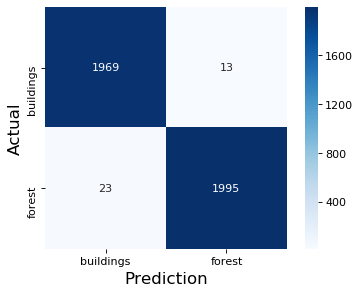

In [119]:
make_confusion_matrix(weighted_voting_classifier)

As given by the confusion matrix, the number of false positive and false negative samples are quite reduced. This signifies the importance of using ensemble learning method in image classification.

## Conclusion

In this part of the project, with optimal model hyperparameters, image augmentation, and ensemble methods, we show the path towards achieving the goal of near-perfect binary image classification. Based on the highest accuracy score, random forest model is used for predicting the labels on the test dataset. With image augmentation and ensemble learning, the accuracy improved from 95.2% to 99.1%.


#### Note: Part 2 Involves Multiclass Classification Using Classical (non-neural network) Models